In [2]:
#import get to call a get request on the site
import requests

#import to manipulate arrays with numpy
import numpy as np

#import to create, clean, and parse data frames with pandas
import pandas as pd

#import to enable datascraping
from bs4 import BeautifulSoup

#import to set up 'sleep' to wait between page loads
import time

import timeit

# import Mongo so our webscraper dumps its scraped data without losing it
from pymongo import MongoClient
import pymongo

#import to make that html readable
import pprint

#import regular expressions operations
import re

#import to get the universe in balance
import random


from dateutil.parser import parse

#import so we can do some heavy stats work
import scipy as sp
from scipy.stats import binom
import scipy.stats as stats

#import to access certain plotting features
import seaborn as sns

#import because we need its program functions
import math

from sklearn import neighbors, datasets, tree, svm, preprocessing, utils
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import log_loss, classification_report, confusion_matrix, mean_squared_error, accuracy_score

#import because we need to plot and make it pretty
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
plt.style.use('ggplot')

In [3]:
df = pd.read_csv('motorcycle_model_ready_data')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27769 entries, 0 to 27768
Data columns (total 51 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      27769 non-null  int64  
 1   title           27769 non-null  object 
 2   year            27769 non-null  float64
 3   price           27769 non-null  float64
 4   neighborhood    24961 non-null  object 
 5   description     27769 non-null  object 
 6   url             27769 non-null  object 
 7   model           27769 non-null  object 
 8   vin             27769 non-null  int64  
 9   condition       27769 non-null  int64  
 10  cryptocurrency  27769 non-null  int64  
 11  delivery        27769 non-null  int64  
 12  engine_size     27769 non-null  float64
 13  fuel_type       26232 non-null  object 
 14  mileage         27769 non-null  float64
 15  color           27637 non-null  object 
 16  street_legal    27769 non-null  int64  
 17  title_status    27743 non-null 

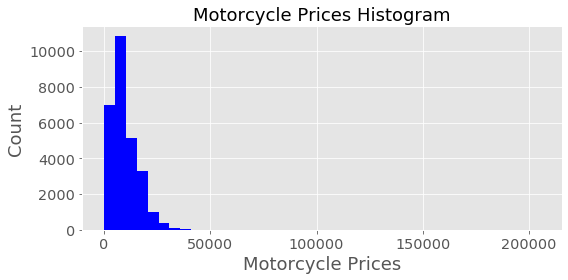

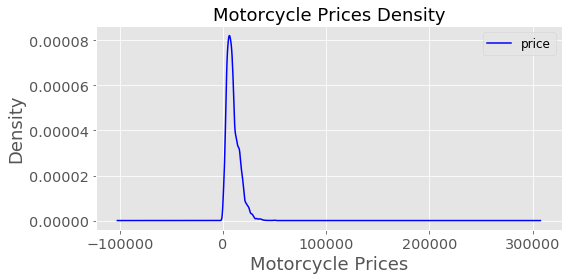

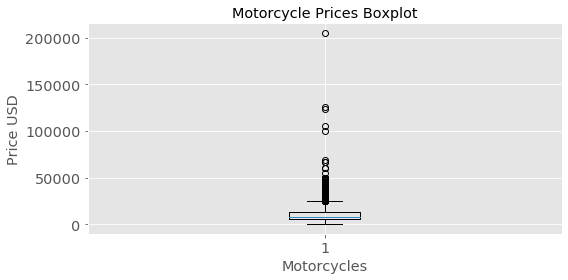

In [5]:
# Let's build some plots and view our price data with a different perspective
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.hist(df['price'], color = 'blue', bins = 40)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Count", fontsize=18);
plt.title("Motorcycle Prices Histogram", fontsize=18);
plt.tight_layout()
plt.show()

price=df['price'].astype(float)
price.plot.density(color ='blue')
plt.legend(fontsize=12)
plt.xlabel("Motorcycle Prices", fontsize=18)
plt.ylabel("Density", fontsize=18);
plt.title("Motorcycle Prices Density", fontsize=18);
plt.tight_layout()
plt.show()


params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 4),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.boxplot(df['price'].array)
plt.xlabel("Motorcycles")
plt.ylabel("Price USD")
plt.title("Motorcycle Prices Boxplot")
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'years plotted by row')

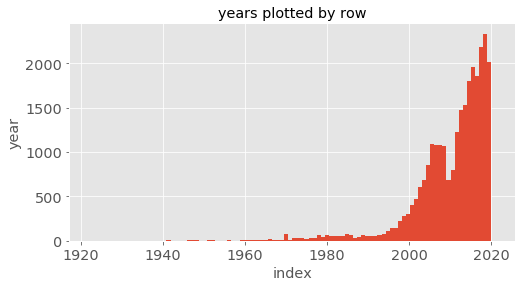

In [6]:
plt.hist(df['year'], 100)
plt.xlabel('index')
plt.ylabel('year')
plt.title('years plotted by row')

In [ ]:
pd.plotting.scatter_matrix(df)
plt.tight_layout()
plt.show()

/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:80: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[j])
/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:81: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(boundaries_list[i])
/home/eric/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/misc.py:71: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(boundaries_list[i])


In [77]:
X1 = df.drop(['manua', 'excellent''autom', 'manual', 'black', 'street_legal', 'Unnamed: 0', 'price', 'title', 'neighborhood', 'description', 'url', 'model', 'condition', 'fuel_type', 'color', 'title_status', 'transmission', 'bike_type', 'clean', 'stree', 'other', 'electric', 'dual-', 'brown', 'stand', 'cryptocurrency', 'bobbe', 'Unnamed: 47', 'lien', 'rebuilt', 'fair', 'manual', 'salvage', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'salvage.1', 'diesel', 'missing', 'parts only', 'scoot'] axis=1).to_numpy()
y1 = df['price'].to_numpy()

In [78]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=.33, random_state=42)

rf1 = RandomForestRegressor(n_estimators=100, oob_score=True)
rf1.fit(X1_train, y1_train)
pred1 = rf1.predict(X1_test)

In [79]:
rf1.score(X1_test, y1_test), rf1.oob_score_

(0.5631488138525811, 0.4537757588075617)

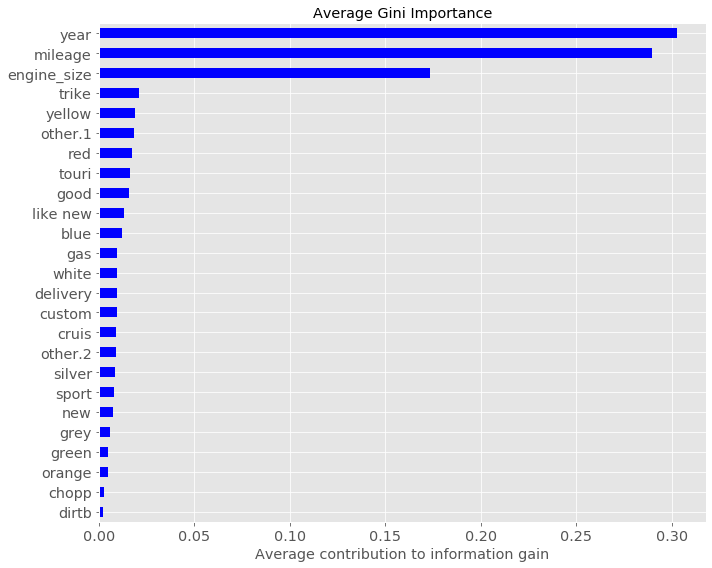

In [80]:
feat_scores = pd.Series(rf1.feature_importances_,
                           index=df.drop(['manua', 'excellent', 'autom', 'manual', 'black', 'street_legal','Unnamed: 0', 'price', 'title', 'neighborhood', 'description', 'url', 'model', 'condition', 'fuel_type', 'color', 'title_status', 'transmission', 'bike_type', 'clean', 'stree', 'other', 'electric', 'dual-', 'brown', 'stand', 'cryptocurrency', 'bobbe', 'Unnamed: 47', 'lien', 'rebuilt', 'fair', 'manual', 'salvage', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'salvage.1', 'diesel', 'missing', 'parts only', 'scoot', 'Unnamed: 39', 'Unnamed: 20', 'Unnamed: 66', '''clean<p class="attrgroup">
<span class="otherpostings">
<a href="//oklahomacity.craigslist.org/search/sss?userid=336173385">
more ads  by this user        </a>
</span>
</p>]'''], axis=1).columns)
feat_scores = feat_scores.sort_values()
ax = feat_scores.plot(kind='barh', 
                      figsize=(10,8),
                      color='b')
ax.set_title('Average Gini Importance')
ax.set_xlabel('Average contribution to information gain');
plt.savefig("info_gain_first_pass.png") 
plt.tight_layout()

In [68]:
df.drop(['Unnamed: 0', 'price', 'title', 'neighborhood', 'description', 'url', 'model', 'condition', 'fuel_type', 'color', 'title_status', 'transmission', 'bike_type', 'clean', 'stree', 'other', 'electric', 'dual-', 'brown', 'stand', 'cryptocurrency', 'bobbe', 'Unnamed: 47', 'lien', 'rebuilt', 'fair', 'manual', 'salvage', 'moped', 'purple', 'cafe ', 'vin', 'hybrid', 'salvage.1', 'diesel', 'missing', 'parts only', 'scoot', 'Unnamed: 39', 'Unnamed: 20', 'Unnamed: 66', '''clean<p class="attrgroup">
<span class="otherpostings">
<a href="//oklahomacity.craigslist.org/search/sss?userid=336173385">
more ads  by this user        </a>
</span>
</p>]'''], axis=1).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22030 entries, 0 to 22029
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          22030 non-null  float64
 1   delivery      22030 non-null  int64  
 2   engine_size   22030 non-null  float64
 3   mileage       22030 non-null  float64
 4   street_legal  22030 non-null  int64  
 5   chopp         22030 non-null  int64  
 6   cruis         22030 non-null  int64  
 7   dirtb         22030 non-null  int64  
 8   sport         22030 non-null  int64  
 9   touri         22030 non-null  int64  
 10  trike         22030 non-null  int64  
 11  autom         22030 non-null  int64  
 12  manua         22030 non-null  int64  
 13  other.1       22030 non-null  int64  
 14  black         22030 non-null  int64  
 15  blue          22030 non-null  int64  
 16  custom        22030 non-null  int64  
 17  green         22030 non-null  int64  
 18  grey          22030 non-nu

In [64]:
df['''clean<p class="attrgroup"><span class="otherpostings"><a href="//oklahomacity.craigslist.org/search/sss?userid=336173385:>more ads by this user     </a></span><p>"''']

KeyError: 'clean<p class="attrgroup"><span class="otherpostings"><a href="//oklahomacity.craigslist.org/search/sss?userid=336173385:>more ads by this user     </a></span><p>"'

ModuleNotFoundError: No module named 'importance_and_dependence'

In [ ]:
model3 = MyRandomForestRegressor(n_trees=200)
model3.fit(X_train.values, y_train)
perm_feat_imp = my_oob_permutation_importance(model3, X_train.values, y_train, scorer=neg_mse)

perm_importance_series = pd.Series(data=perm_feat_imp, index=boston_names)
ax = perm_importance_series.sort_values().plot(kind='barh', figsize=(10,4))
ax.set_title('Average Permutation Importance')
ax.set_xlabel('Average increase in OOB error (mse) after shuffling');